In [37]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [38]:
# Monthly data
monthly = pd.read_csv('UR.csv', sep = ',', skiprows = 1)
monthly.head()

,Region,Date,Frequency,Value
0,Andhra Pradesh,31-01-2020,M,7.11
1,Andhra Pradesh,29-02-2020,M,5.66
2,Andhra Pradesh,31-03-2020,M,9.88
3,Andhra Pradesh,30-04-2020,M,32.30
4,Andhra Pradesh,31-05-2020,M,24.64


In [39]:
# Data Cleaning
monthly.columns = monthly.columns.str.strip()
monthly['Date'] = pd.to_datetime(monthly['Date'])

In [49]:
# Classifying as categories
monthly['is_UT'] = 'States';
UT = ['Delhi', 'Chandigarh', 'Puducherry', 'Jammu & Kashmir']
monthly.head()
monthly['is_UT'][monthly['Region'] == 'India'] = 'India Urban' ; # Classifying India Urban

<ipython-input-49-0f8a09189d89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly['is_UT'][monthly['Region'] == 'India'] = 'India Urban' ; # Classifying India Urban


In [50]:
for key, value in monthly['Region'].items():
    if value in UT:
        monthly['is_UT'][key] = 'UTs'

<ipython-input-50-9d425b93af15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly['is_UT'][key] = 'UTs'


In [53]:
monthly['Month'] = pd.DatetimeIndex(monthly['Date']).month
monthly['Year'] = pd.DatetimeIndex(monthly['Date']).year
monthly.head()

,Region,Date,Frequency,Value,is_UT,Month,Year
0,Andhra Pradesh,2020-01-31,M,7.11,States,1,2020
1,Andhra Pradesh,2020-02-29,M,5.66,States,2,2020
2,Andhra Pradesh,2020-03-31,M,9.88,States,3,2020
3,Andhra Pradesh,2020-04-30,M,32.30,States,4,2020
4,Andhra Pradesh,2020-05-31,M,24.64,States,5,2020


In [54]:
monthly['is_UT'].unique()
grouped = monthly.groupby(['is_UT','Year','Month']).mean()
grouped = grouped.reset_index()

In [55]:
import calendar
grouped['Month'] = grouped['Month'].apply(lambda x: calendar.month_abbr[x])
grouped.head()

,is_UT,Year,Month,Value
0,India Urban,2020,Jan,9.70
1,India Urban,2020,Feb,8.65
2,India Urban,2020,Mar,9.41
3,India Urban,2020,Apr,24.95
4,India Urban,2020,May,23.14


In [56]:
x_labels = grouped['Month'].astype(str) +  grouped['Year'].astype(str).map(lambda x: x[2:])

x_labels[:5]

0    Jan20
1    Feb20
2    Mar20
3    Apr20
4    May20
dtype: object

<IPython.core.display.Javascript object>


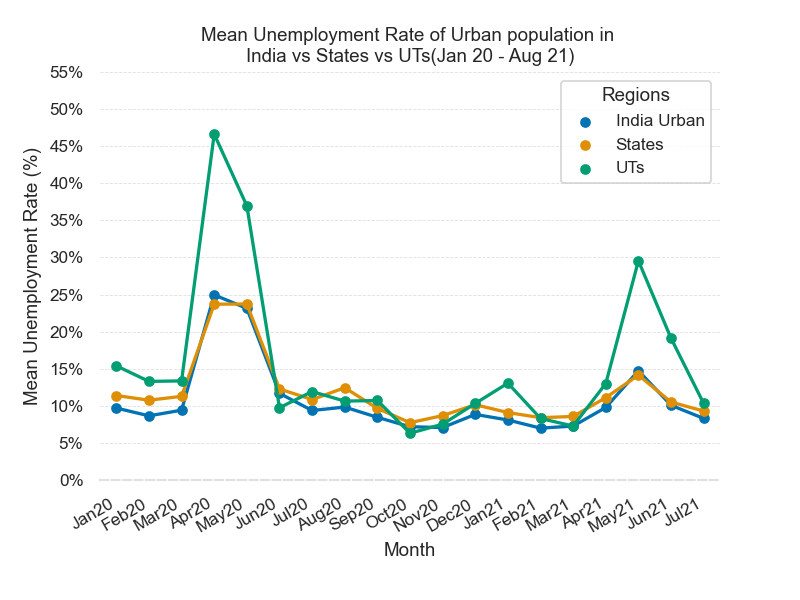

[Text(0, 0, '0%'),
 Text(0, 5, '5%'),
 Text(0, 10, '10%'),
 Text(0, 15, '15%'),
 Text(0, 20, '20%'),
 Text(0, 25, '25%'),
 Text(0, 30, '30%'),
 Text(0, 35, '35%'),
 Text(0, 40, '40%'),
 Text(0, 45, '45%'),
 Text(0, 50, '50%'),
 Text(0, 55, '55%')]

In [57]:
import seaborn as sns
fig = plt.figure()

sns.pointplot(x = x_labels, y = 'Value', hue = 'is_UT', data = grouped, palette = "colorblind", scale = 0.7, linewidth = '')

# Aesthetics
sns.set_style("white", {'font-family': [u'Arial']})
sns.set_context('notebook', font_scale=.90)

sns.despine(left = True)
plt.xlabel('Month')
plt.ylabel('Mean Unemployment Rate (%)')
plt.title('Mean Unemployment Rate of Urban population in \nIndia vs States vs UTs(Jan 20 - Aug 21)')

plt.gca().spines['bottom'].set_color('#e1e1e1')
plt.gca().spines['bottom'].set_linestyle('--')
fig.autofmt_xdate()
plt.gca().set_ylim(0,20)
plt.gca().set_yticks(range(0,60,5))
plt.gca().yaxis.grid(which = 'major', color = '#e1e1e1', linestyle = '--', linewidth = 0.5)

# Customize legend
plt.legend(title='Regions')

ylabs = plt.gca().get_yticks().astype(int).astype(str)
ylabs  = [str(x) + '%' for x in ylabs]
plt.gca().set_yticklabels(ylabs)

ylabs = plt.gca().get_yticks().astype(int).astype(str)
ylabs  = [str(x) + '%' for x in ylabs]
plt.gca().set_yticklabels(ylabs)